### Libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
import seaborn as sns

Change the parameters and the expression according to your needs

In [2]:
np.random.seed(42)

In [9]:
def data_gen_process(seed, beta1, beta2, n, lower_bound_x, upper_bound_x, var_epsilon):

   np.random.seed(seed)
   epsilon = np.random.normal(0, var_epsilon, n)
   x = np.random.uniform(lower_bound_x, upper_bound_x, n)
   x_law = "uniform"
   y = beta1*x + beta2*x**2 + epsilon
   expression = "quadratic"
   
   df_x = pd.DataFrame(x, columns=['x_values'])
   df_y = pd.DataFrame(y, columns=['y_values'])

   df_x.to_csv(f"Data/x_{x_law}_values_{lower_bound_x}_{upper_bound_x}_n{n}.csv")
   df_y.to_csv(f"Data/y_{expression}_values_beta1_{beta1}_beta2_{beta2}_n{n}_x_{lower_bound_x}_{upper_bound_x}_vareps_{var_epsilon}.csv")

   print(f"X values have been saved in the file : x_{x_law}_values_{lower_bound_x}_{upper_bound_x}_n{n}.csv")
   print(f"Y values have been saved in the file : y_{expression}_values_beta1_{beta1}_beta2_{beta2}_n{n}_x_{lower_bound_x}_{upper_bound_x}_vareps_{var_epsilon}.csv")

In [10]:
data_gen_process(42,1,0.16,1000,0,5,1)

X values have been saved in the file : x_uniform_values_0_5_n1000.csv
Y values have been saved in the file : y_quadratic_values_beta1_1_beta2_0.16_n1000_x_0_5_vareps_1.csv


Other example of generating data process

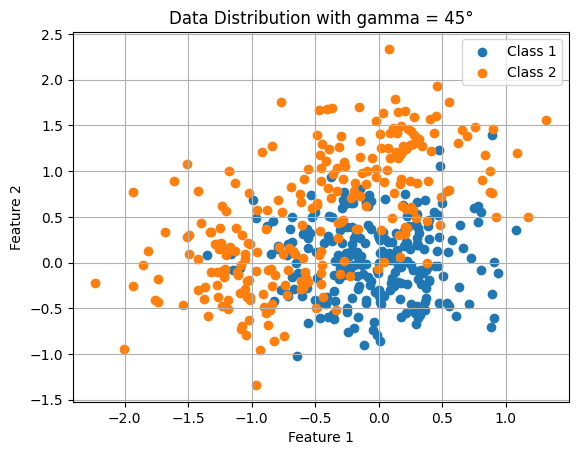

In [6]:
def generate_data(n, gamma):  

    mean1 = [0, 0]
    mean2a = [0, 1]
    gamma_rad = np.deg2rad(gamma)
    mean2b = [np.cos(gamma_rad), np.sin(gamma_rad)]
    cov = np.diag([0.2, 0.2])  # Covariance matrix
    
    n_class = n // 2

    class1 = np.random.multivariate_normal(mean1, cov, n_class)
    
    class2a = np.random.multivariate_normal(mean2a, cov, n_class // 2)
    class2b = np.random.multivariate_normal(mean2b, cov, n_class // 2)
    class2 = np.vstack((class2a, class2b))
    
    labels_class1 = np.zeros(n_class)
    labels_class2 = np.ones(n_class)
    
    X = np.vstack((class1, class2))
    y = np.hstack((labels_class1, labels_class2))

    df_x = pd.DataFrame(X, columns=[['x_values_abscisses', 'x_values_ordonnees']])
    df_y = pd.DataFrame(y, columns=['y_class'])

    df_x.to_csv(f"Data/x_values_gamma{gamma}_n{n}.csv")
    df_y.to_csv(f"Data/y_values_gamma{gamma}_n{n}.csv")

    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'Data Distribution with gamma = {45}°')
    plt.grid(True)
    plt.show()

generate_data(500, 180)

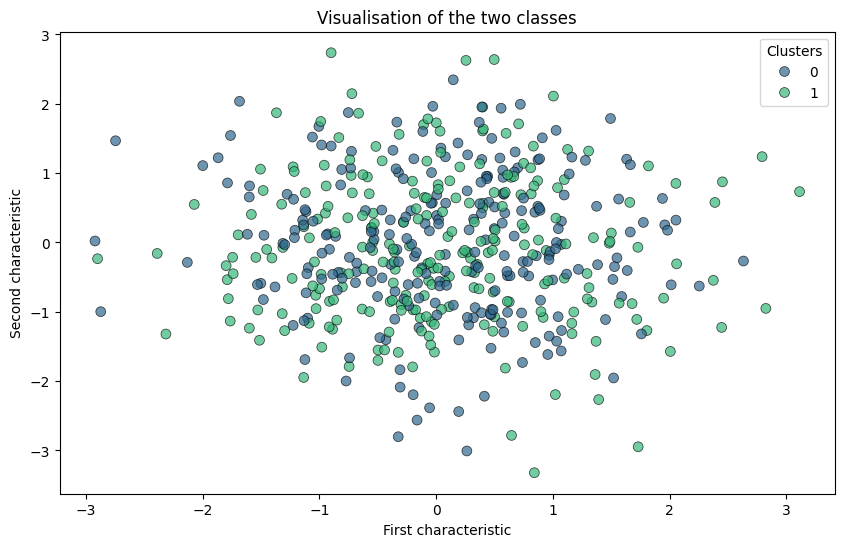

In [9]:
from sklearn.datasets import make_classification
def simulate_classification(n, n_features):

   X, y = make_classification(n_samples=n, n_features=n_features, random_state=42)

   df_x = pd.DataFrame(X)
   df_y = pd.DataFrame(y, columns=['y_values'])

   df_x.to_csv(f"Data/x_make_classification_{n}_{n_features}.csv")
   df_y.to_csv(f"Data/y_make_classification_{n}_{n_features}.csv")

   plt.figure(figsize=(10, 6))
   sns.scatterplot(x=df_x.iloc[:, 0], y=df_x.iloc[:, 1], hue=df_y['y_values'], palette="viridis", s=50, alpha=0.7, edgecolor='k')
   plt.title("Visualisation of the two classes")
   plt.xlabel("First characteristic")
   plt.ylabel("Second characteristic")
   plt.legend(title="Clusters")
   plt.show()


simulate_classification(500,30)

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Performance:
Silhouette Score: 0.4486718673398085

Agglomerative Clustering Performance:
Silhouette Score: 0.4486718673398085


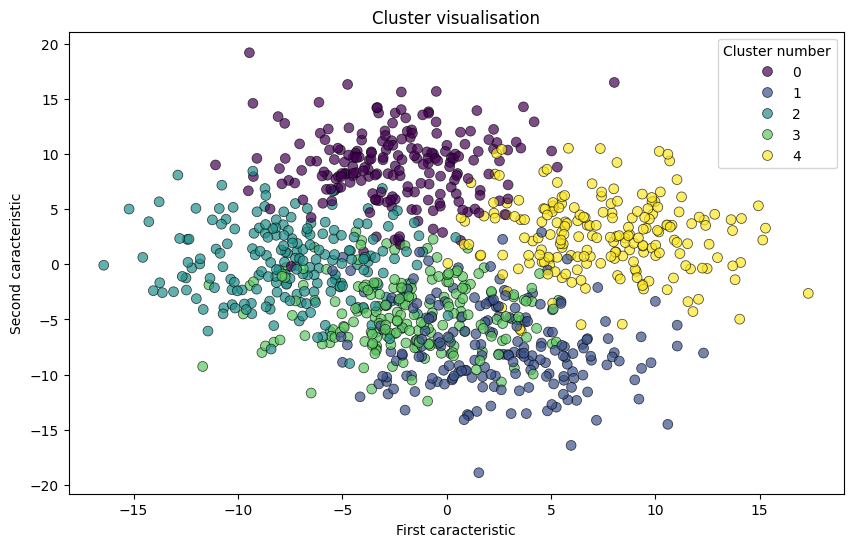

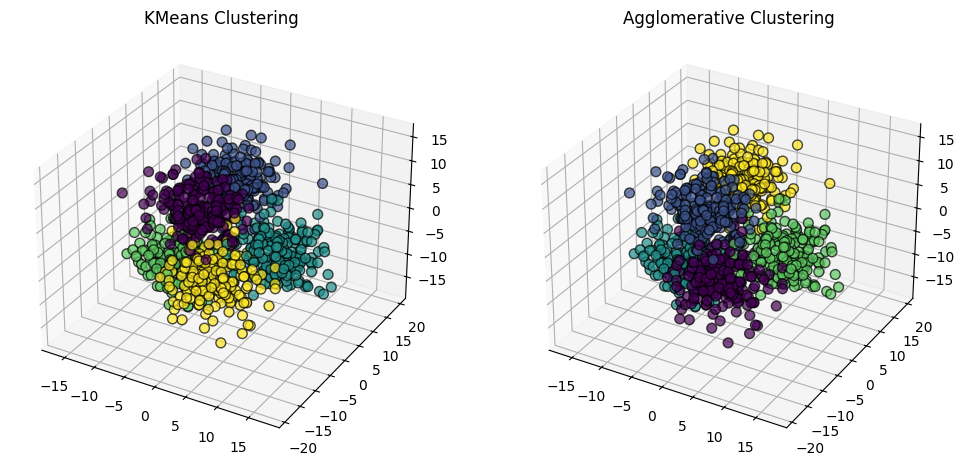

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def simulate_clustering():

   X, y = make_blobs(n_samples=1000, n_features=20, centers=5, cluster_std=3.25, random_state=42)

   df_x = pd.DataFrame(X)
   df_y = pd.DataFrame(y, columns=['cluster'])

   df_x.to_csv("Data/x_make_blobs_1000_20.csv", index=False)
   df_y.to_csv("Data/y_make_blobs_1000_20.csv", index=False)

   model1 = KMeans(n_clusters=5, random_state=42)
   labels1 = model1.fit_predict(X)
   score1 = silhouette_score(X, labels1)

   model2 = AgglomerativeClustering(n_clusters=5)
   labels2 = model2.fit_predict(X)
   score2 = silhouette_score(X, labels2)

   print("KMeans Performance:")
   print("Silhouette Score:", score1)

   print("\nAgglomerative Clustering Performance:")
   print("Silhouette Score:", score2)

   plt.figure(figsize=(10, 6))
   sns.scatterplot(x=df_x.iloc[:, 0], y=df_x.iloc[:, 1], hue=df_y['cluster'], palette="viridis", s=50, alpha=0.7, edgecolor='k')
   plt.title("Cluster visualisation")
   plt.xlabel("First caracteristic")
   plt.ylabel("Second caracteristic")
   plt.legend(title="Cluster number")
   plt.show()

   fig = plt.figure(figsize=(12, 6))
   ax1 = fig.add_subplot(121, projection='3d')
   ax2 = fig.add_subplot(122, projection='3d')

   ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels1, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
   ax1.set_title('KMeans Clustering')

   ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels2, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
   ax2.set_title('Agglomerative Clustering')

simulate_clustering()

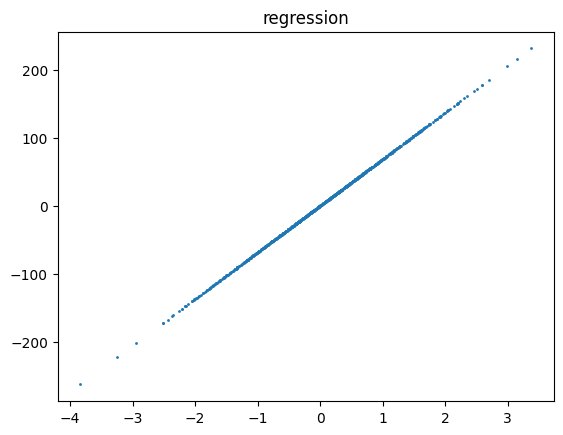

In [14]:
from sklearn.datasets import make_regression
def simulate_regression(n, n_features):

   X, y = make_regression(n_samples=n, n_features=n_features, noise = 0.1)

   df_x = pd.DataFrame(X)
   df_y = pd.DataFrame(y, columns=['y_values'])

   df_x.to_csv(f"Data/x_make_regression_{n}_{n_features}.csv")
   df_y.to_csv(f"Data/y_make_regression_{n}_{n_features}.csv")

   plt.figure()
   plt.title("regression")
   plt.scatter(X,y, s=1)
   plt.show()


simulate_regression(1000,1)